# Step 2 Skills & Degree Analysis for Different Majors

In this part, we analyzed the __skill set__ and __degree__ requirement for different majors.
<p> To get the __skill set__ required for different majors, we did natural language processing on the posts of the jobs, and extract the top skills that are related to different majors. Further analysis was also done by comparing those skill sets.
<p> The __degree requirement__ are compared across different majors and different job types (internship and fulltime)

## Part 1 Qualifications & Skills

In [160]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


import string
import nltk
#from nltk import corpus
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   # sklearn --- primer machine learning package
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib_venn import venn3
from wordcloud import WordCloud

__Read data from the csv file got from website__

In [123]:
summary_stat = pd.read_csv('Jobdescription/summary_stat.csv')
summary_che = pd.read_csv('Jobdescription/summary_che.csv')
summary_mse = pd.read_csv('Jobdescription/summary_mse.csv')

__Check how many missing values__

In [124]:
print (summary_stat.isnull().sum())
print (summary_che.isnull().sum())
print (summary_mse.isnull().sum())

Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64


## Without using subtitles

In [125]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

stop = set(stopwords.words('english'))

In [126]:
def diction_qual(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [127]:
def skills(df):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual(job_text)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

**skill_major_1** is a data frame of the words, number of posts containing that word, and the frequency of the word.

In [128]:
skills_stat_1 = skills(summary_stat)
skills_che_1 = skills(summary_che)
skills_mse_1 = skills(summary_mse)

#### Bar Plot Word Frequency
Note: Only word frequency higher than 0.1 are considered here

In [129]:
def word_barplot(df):
    """
    This function takes the data frame containing word and # of post
    """
    df = df[df['percent'] > 0.1]
    plt.figure(figsize = (20,6))

    words = list(df['word'])
    n = len(words)
    x_pos = np.arange(n)
    y = list(df['percent'])
    #width = .1
    
    plt.bar(x_pos, y, 
            #width, 
            align='center',color='steelblue',alpha=.5)
    plt.xlim(-1,n+1)
    plt.xticks(x_pos, words, rotation=90)
    plt.ylabel('Frequency')
    plt.title('High Frequency words')
    plt.legend()

    plt.show()


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


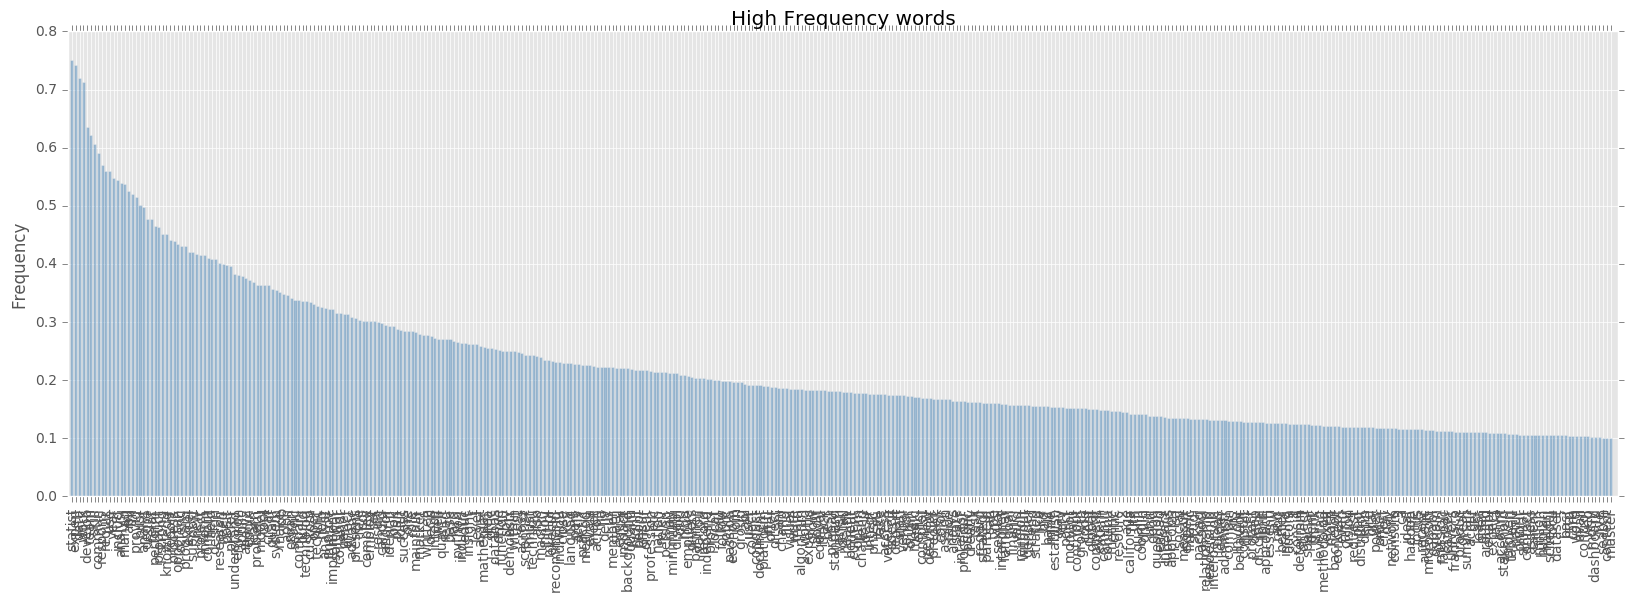

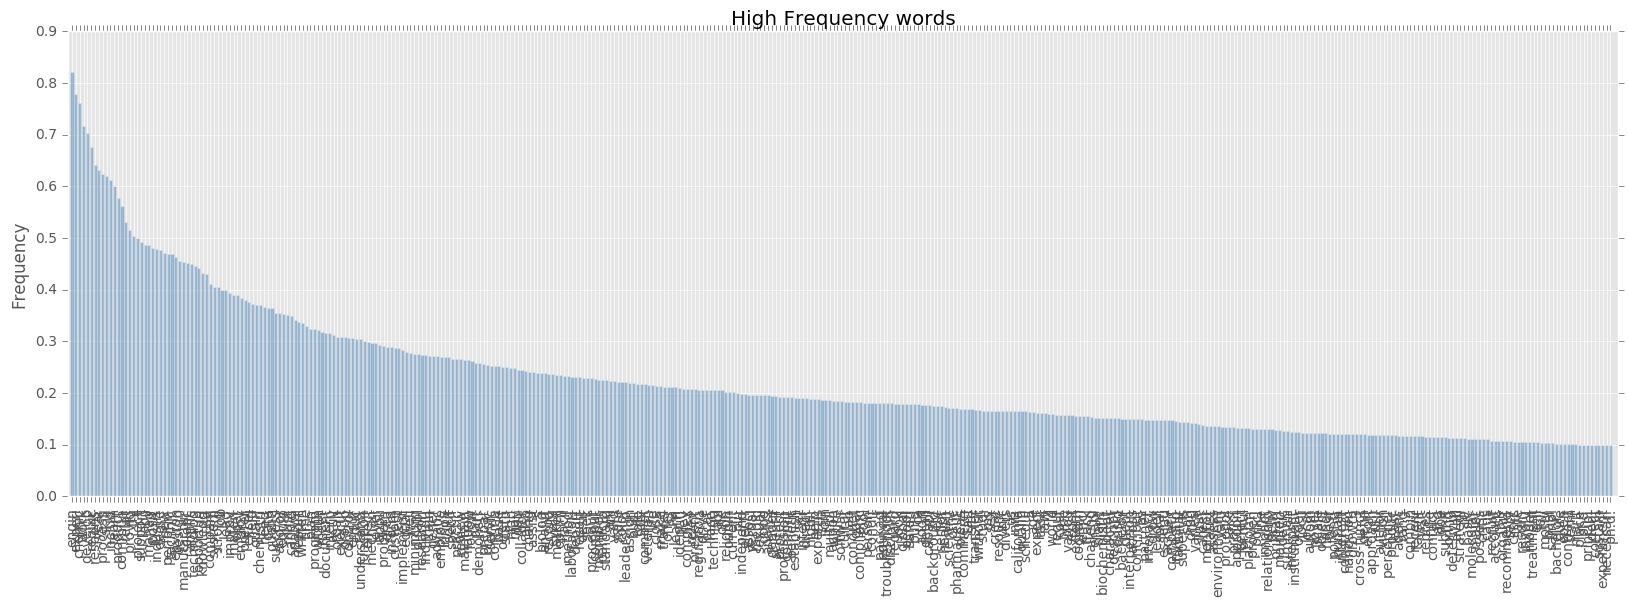

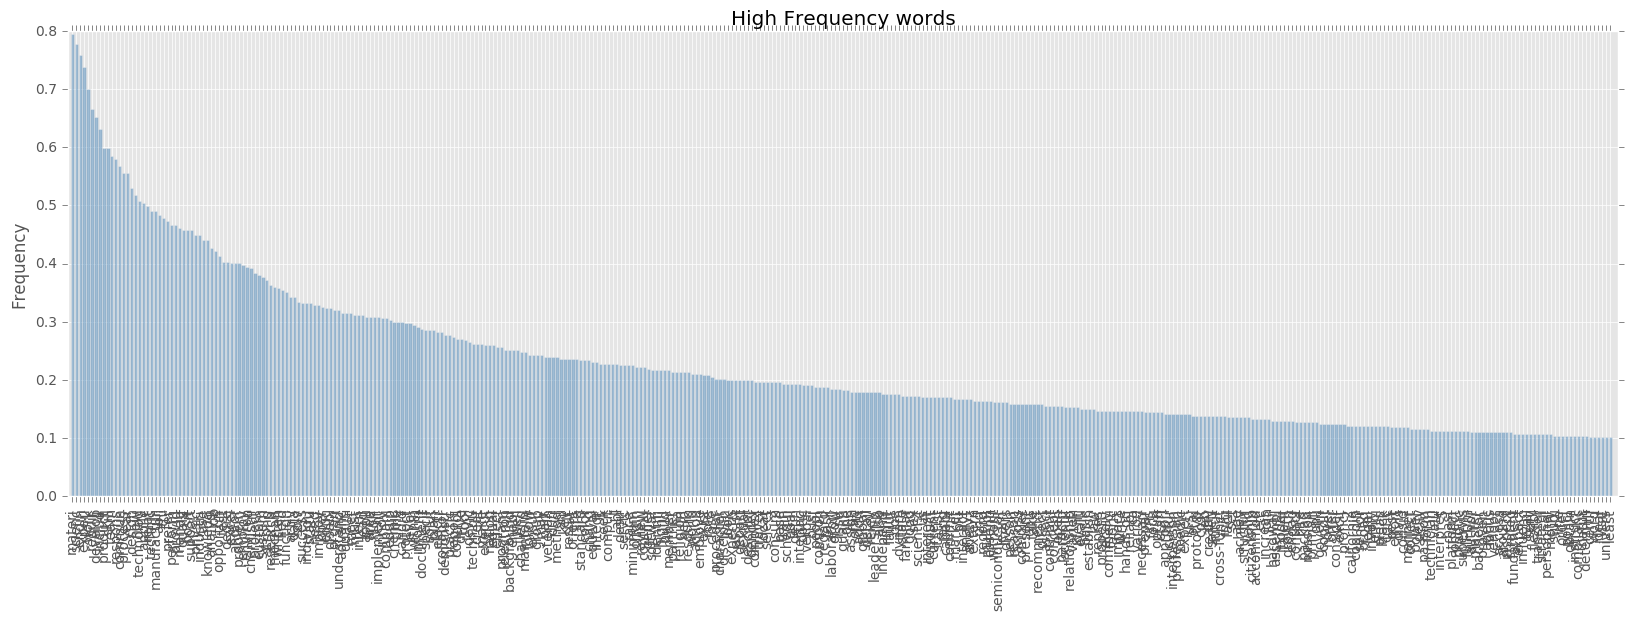

In [130]:
word_barplot(skills_stat_1)
word_barplot(skills_che_1)
word_barplot(skills_mse_1)

In [131]:
def word_cloud(kw_list):
    '''This function generate the word cloud of the list of skill in a dataframe
    '''
    kw_list = kw_list[kw_list['percent'] > 0.1]
    text = []

    for i in range(len(kw_list)):
        text.append((kw_list['word'][i] + ' ')*kw_list['# of posts'][i])
    text = ''.join(text)
    
    plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    text_wordcloud = WordCloud().generate(text)
    plt.imshow(text_wordcloud)
    plt.axis("off")
    plt.show()

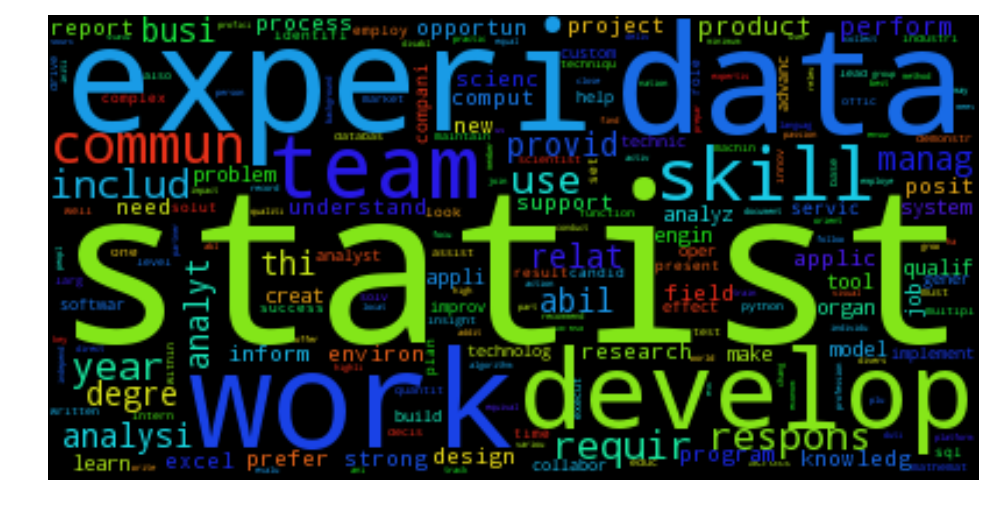

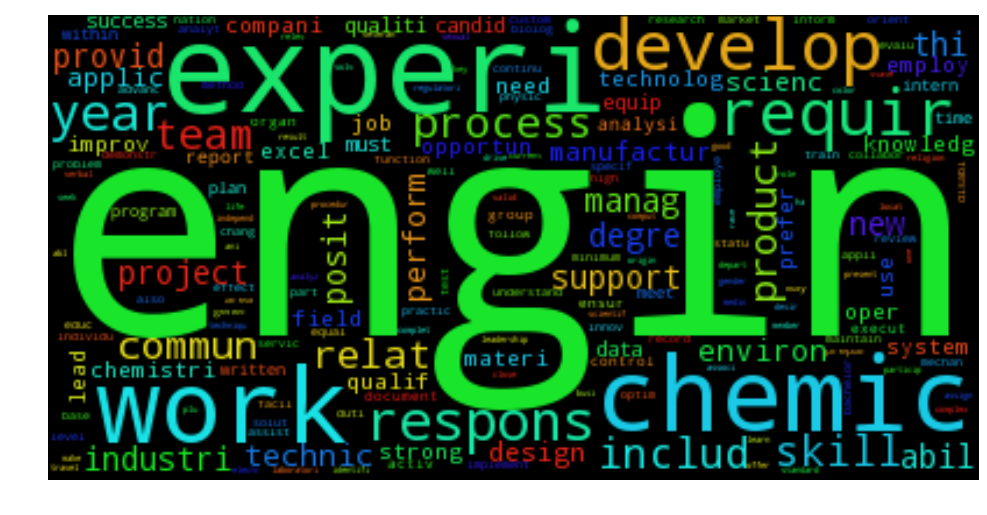

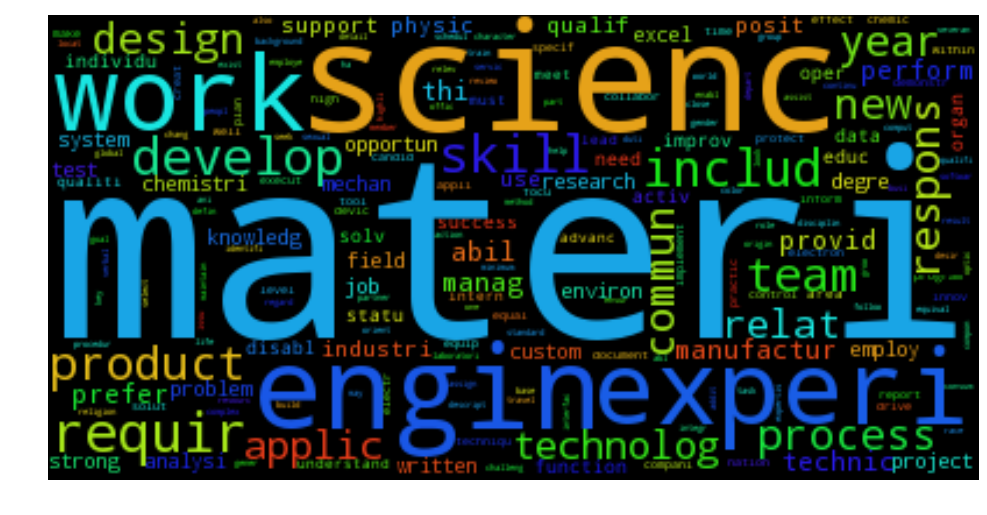

In [132]:
word_cloud(skills_stat_1)
word_cloud(skills_che_1)
word_cloud(skills_mse_1)

**skills_stat_high** is a data frame with words with frequency > 0.1

In [133]:
skills_stat_high = skills_stat_1[skills_stat_1['percent'] > 0.1]
skills_che_high = skills_che_1[skills_che_1['percent'] > 0.1]
skills_mse_high = skills_mse_1[skills_mse_1['percent'] > 0.1]

The following codes are trying to figure out the shared skills across different major

In [134]:
stat_union_che = list(set(list(skills_stat_high['word'])).union(list(skills_che_high['word'])))
stat_union_mse = list(set(list(skills_stat_high['word'])).union(list(skills_mse_high['word'])))
che_union_mse = list(set(list(skills_che_high['word'])).union(list(skills_mse_high['word'])))

In [135]:
print (len(stat_union_che))
print (len(stat_union_mse))
print (len(che_union_mse))

492
480
457


In [136]:
stat_intersect_che = list(set(list(skills_stat_high['word'])).intersection(list(skills_che_high['word'])))
stat_intersect_mse = list(set(list(skills_stat_high['word'])).intersection(list(skills_mse_high['word'])))
che_intersect_mse = list(set(list(skills_che_high['word'])).intersection(list(skills_mse_high['word'])))

In [137]:
print (len(stat_intersect_che))
print (len(stat_intersect_mse))
print (len(che_intersect_mse))

317
316
332


In [138]:
stat_intersect_che_intersect_mse = list(set(stat_intersect_che).intersection(stat_intersect_mse))

In [139]:
print (len(stat_intersect_che_intersect_mse))

298


In [140]:
print (len(list(skills_stat_high['word'])))
print (len(list(skills_che_high['word'])))
print (len(list(skills_mse_high['word'])))

408
401
388


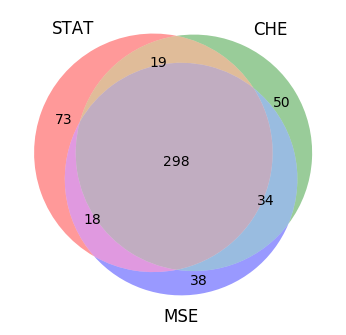

In [141]:
venn3(subsets = (73, 50, 19, 38, 18, 34, 298), set_labels = ('STAT', 'CHE', 'MSE'))

In [142]:
# stat_intersect_che_intersect_mse
#[w for w in stat_intersect_che if w not in stat_intersect_che_intersect_mse]
#[w for w in stat_intersect_mse if w not in stat_intersect_che_intersect_mse]
#[w for w in che_intersect_mse if w not in stat_intersect_che_intersect_mse]

* STAT ^ CHE
<br> 'health', 'autom', 'monitor', 'util', 'assess', 'larg', 'approach', 'vision', 'type', 'summari', 'leader'
* STAT ^ MSE
<br> 'expert', 'access', 'strateg', 'power', 'collect', 'creativ', 'passion', 'dynam', 'consum'
* CHE ^ MSE
<br> 'chemic', 'scientif', 'personnel', 'transfer', 'chemistri', 'lab', 'cross-funct', 'mechan', 'complianc', 'devic', 'travel', 'commerci', 'laboratori', 'facil', 'hands-on', 'equip', 'novel', 'character', 'electr', 'safeti', 'manufactur'

In [143]:
len(['comput','strategi','process','analyz','model','document', 'verbal','independ', 'softwar', 'physic', 'challeng', 
     'team', 'supervis', 'collabor', 'offic', 'optim', 'coordin', 'assist', 'task', 'motiv', 'excel',
     'r', 'test', 'operi', 'interact', 'protect', 'innov', 'talent', 'control', 'program', 'interperson'])

31

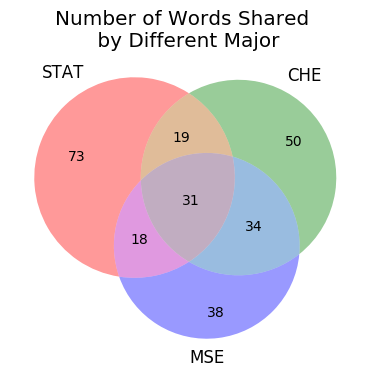

In [144]:
venn3(subsets = (73, 50, 19, 38, 18, 34, 31), set_labels = ('STAT', 'CHE', 'MSE'))
plt.title('Number of Words Shared \n by Different Major')

### Conclusion on Skills
<ol>
    <li> The common words shared by all three majors are **comput(e), strategi, process, analyz, model, document, verbal, independ(ent), softwar(e), physic, challeng(e), team, supervis(e), collabor(ation), offic(e), optim(al), coordin(ation), assist, task, motiv(ative), excel, r, test, operi(ation), interact(ion), protect, innov(ation), talent, control, program, interperson**.
    <li> Words share by **Stat** and **CHE** are **health, autom, monitor, util, assess, larg, approach, vision, type, summari, leader**.
    <li> Words share by **Stat** and **MSE** are **expert, access, strateg, power, collect, creativ, passion, dynam, consum**
    <li> Words share by **CHE** and **MSE** are **chemic(al), scientif(ic), personnel, transfer, chemistri, lab, cross-funct, mechan(ical), complianc(e), devic(e), travel, commerci(al), laboratori, facil(itate), hands-on, equip(ment), novel(ty), character, electr(ic), safeti, manufactur(e)**.
</ol>

## By using subtitles

### Strategy for Extracting Qualifications
<ol>
    <li> compare all subtitles and find out which subtitles are "Qualifications" (__qualif, requir, experi, skill__)
    <li> split text by using subtitles
    <li> compare the word in qualifications and analyze
    
</ol>

In [145]:
# get subtitles inside job description
def get_subtitle(post):
    """
    This function takes the post of each job and get all subtitles of the post
    Input: post in html format
    Output: a list of subtitles
    """
    post = BeautifulSoup(post, "lxml")
    try:
        temp = post.find_all('b')        
        subtitles = [sub.text for sub in temp]
    except AttributeError:
        subtitles = []
    return subtitles

In [146]:
# a list containing the subtitles of each post
subtitles_stat = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_che = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_mse = [get_subtitle(post) for post in list(summary_stat['description'])]

In [147]:
def diction(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a data frame
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = ' '.join(files[i])
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [148]:
def key_sub(subtitles):
    # Lemmata of subtitles and the id of posts containing that Lemmata
    sub_id = diction(subtitles)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    sub_num = {key:len(set(val)) for key,val in sub_id.items()}

    # Sort sub_num
    sorted_sub = [(key, sub_num[key]) for key in sorted(sub_num, key=lambda x : sub_num[x],
                                                                  reverse=True)]
    df_sorted_sub = pd.DataFrame(sorted_sub)
    df_sorted_sub.columns = ['word', '# of posts']
    return df_sorted_sub.iloc[:100,:]

In [149]:
# customized stop words generated from subtitles
stop_sub_stat = list(key_sub(subtitles_stat)['word'])
stop_sub_che = list(key_sub(subtitles_che)['word'])
stop_sub_mse = list(key_sub(subtitles_mse)['word'])

In [150]:
def diction_qual_2(files, stop_major):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation) - set(stop_major)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [151]:
def skills(df, stop_major):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual_2(job_text, stop_major)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

In [152]:
skills_stat_2 = skills(summary_stat, stop_sub_stat)
skills_che_2 = skills(summary_che, stop_sub_che)
skills_mse_2 = skills(summary_mse, stop_sub_mse)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


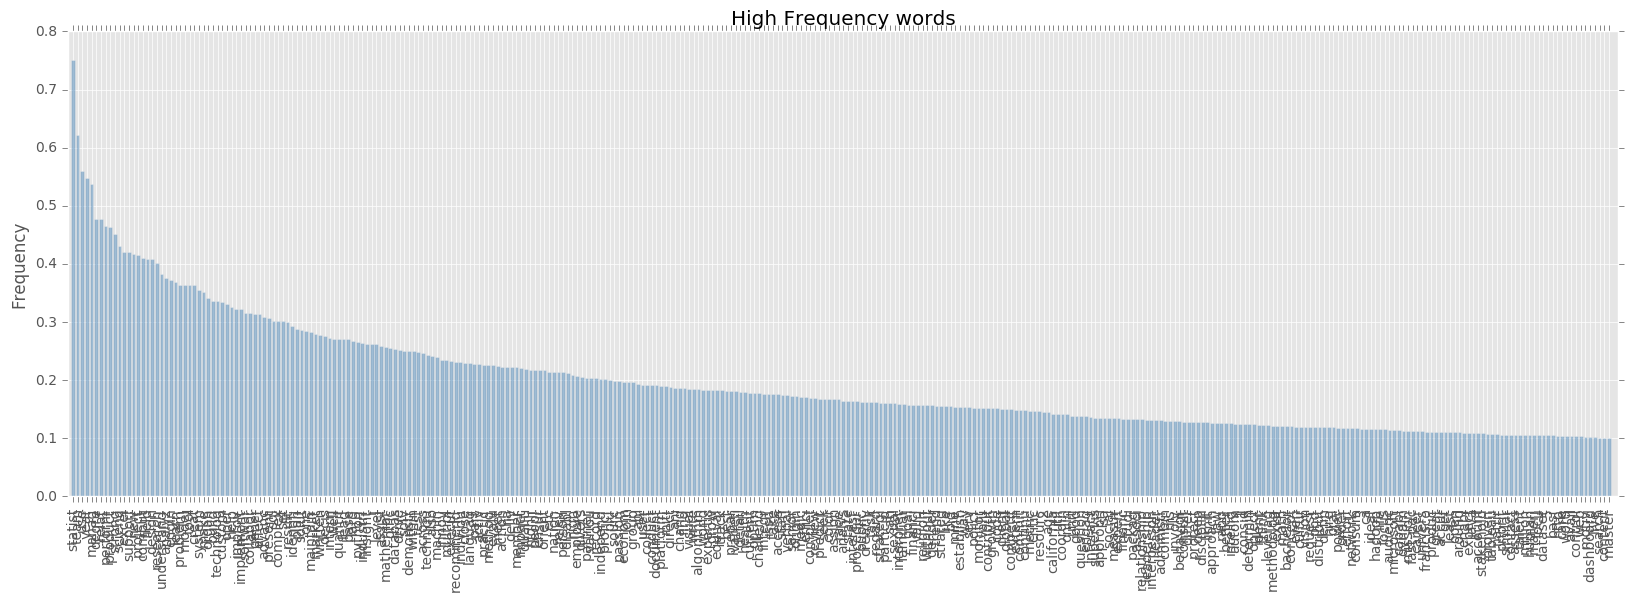

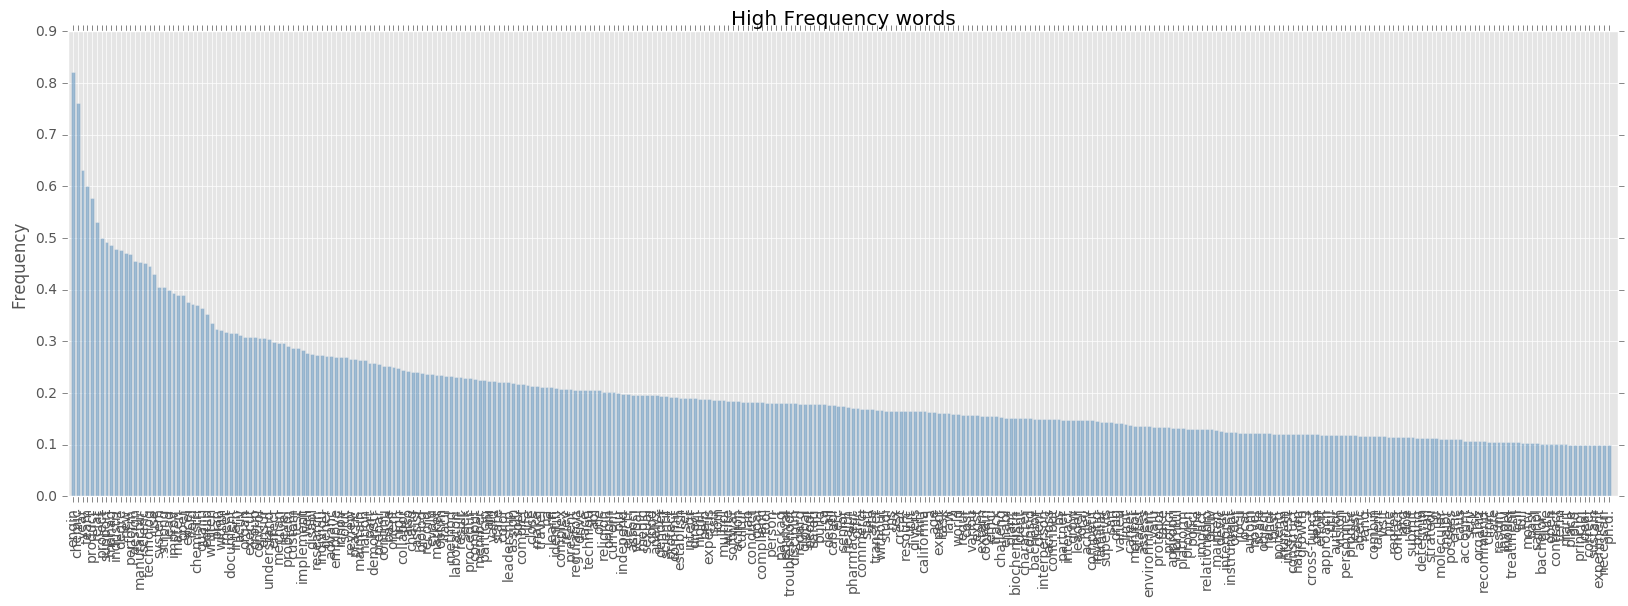

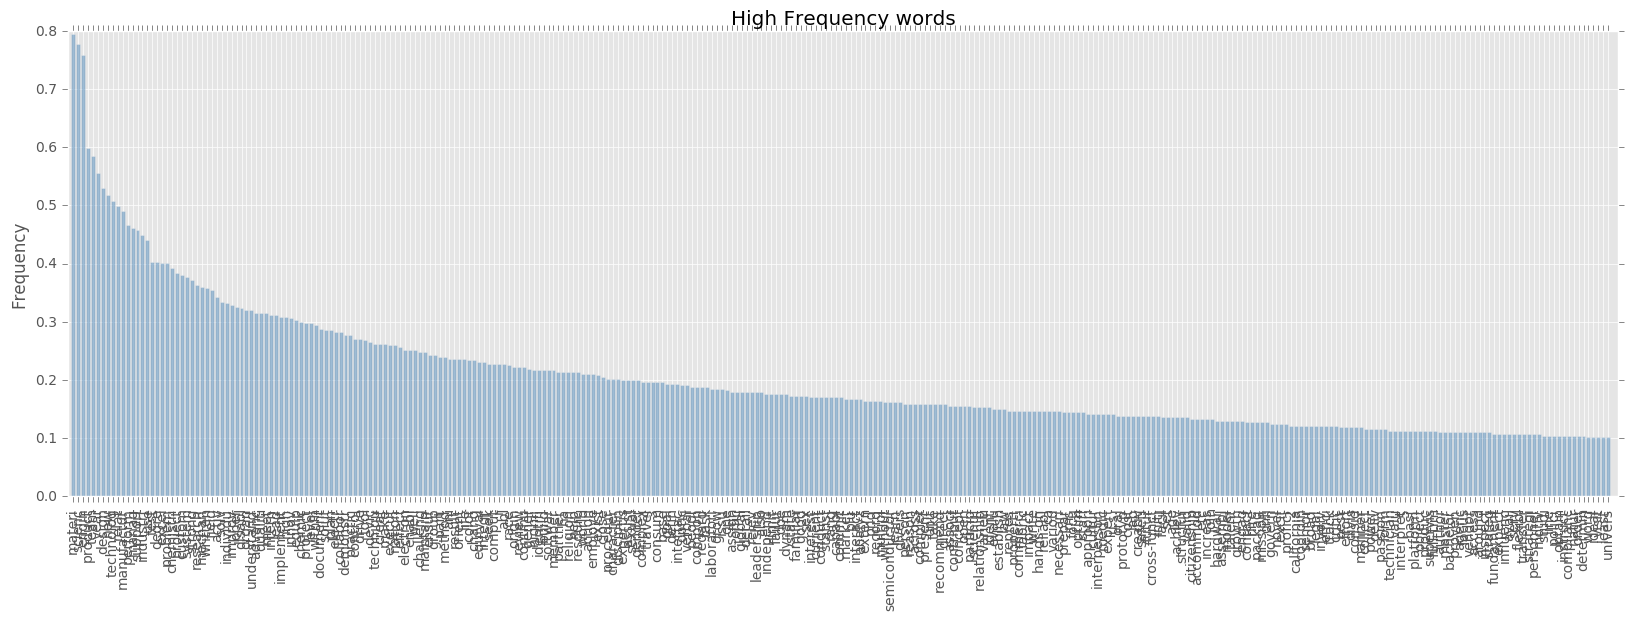

In [153]:
word_barplot(skills_stat_2)
word_barplot(skills_che_2)
word_barplot(skills_mse_2)

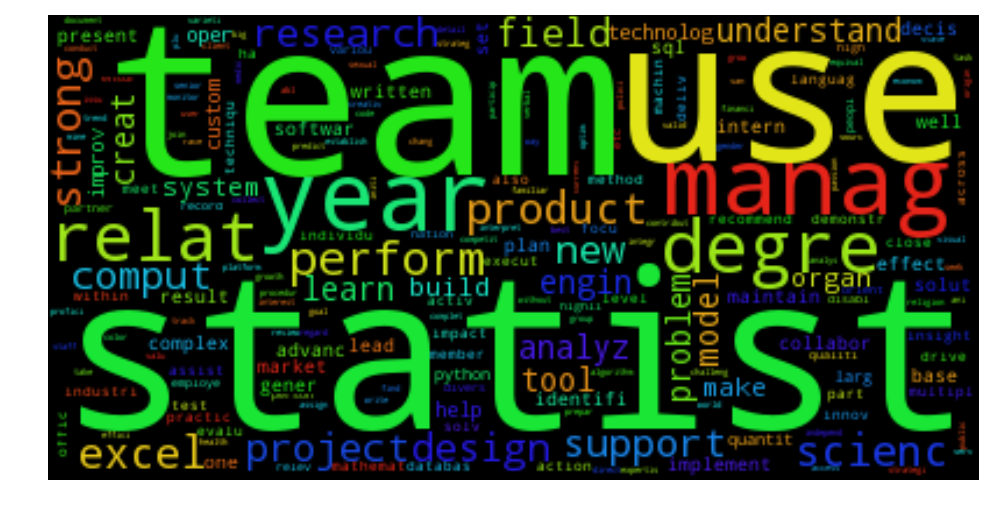

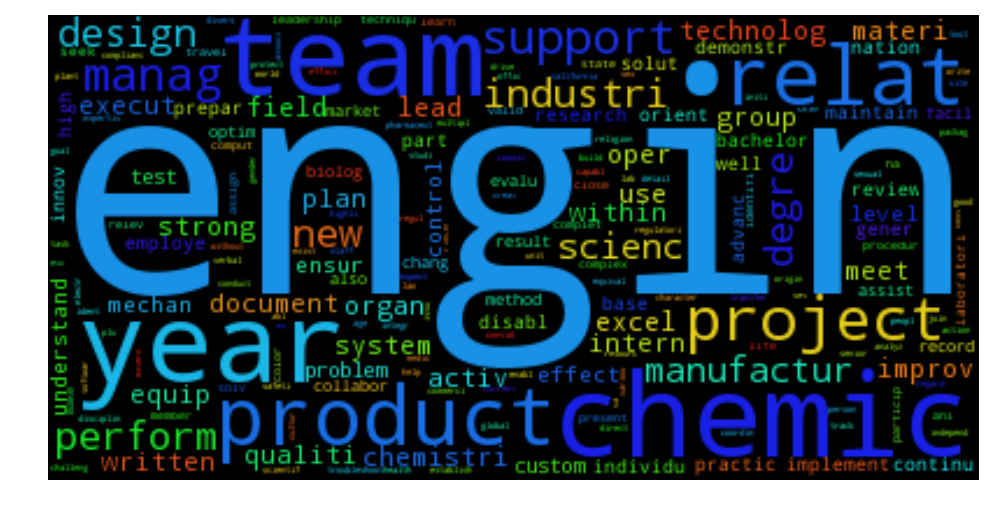

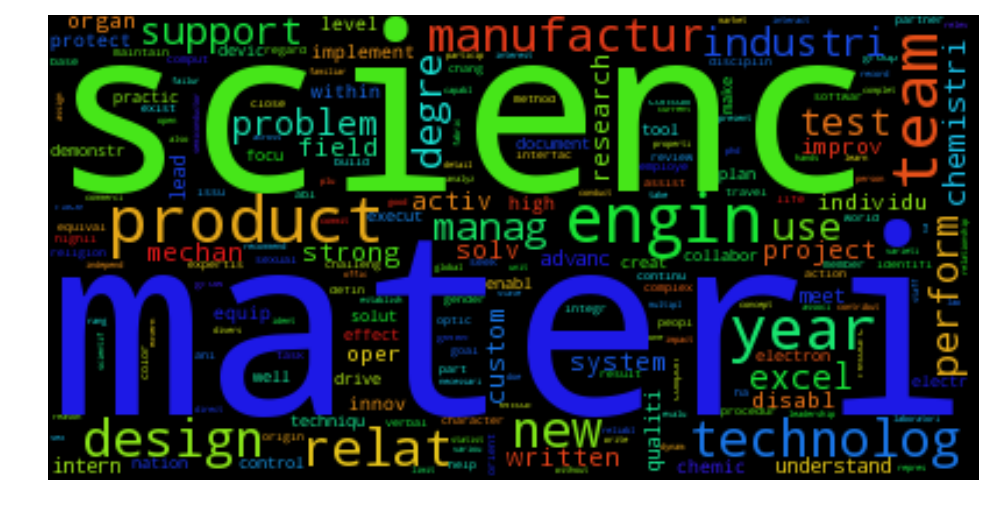

In [154]:
word_cloud(skills_stat_2)
word_cloud(skills_che_2)
word_cloud(skills_mse_2)

# PART 2 Degree Requirement

In [155]:
def degree_require(text):
    '''This function finds whether graduate degree is required in a job description
    Output: scaler of 1 --- requires graduate degree
                      0 --- no requirement for graduate degree
    '''
    kw = ['graduate', 'm.s.', "master's", "phd", "ph.d", "phd's", "ph.d's"]
    result = 'undergrad'
    for word in kw:
        if word in text:
            result = 'graduate'
            break
        break
    return result

In [156]:
def degree_list(df):
    job_des = list(df['description'])
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]
    degree_list = []
    for job in job_text:
        degree_list = degree_list + [degree_require(job)]
    
    return degree_list

In [157]:
# full-time
#summary_stat = pd.read_csv('summary_stat.csv')
#summary_che = pd.read_csv('summary_che.csv')
#summary_mse = pd.read_csv('summary_mse.csv')

degree_list_stat = degree_list(summary_stat)
degree_list_che = degree_list(summary_che)
degree_list_mse = degree_list(summary_mse)

# internship
summary_stat_intern = pd.read_csv('Jobdescription/summary_stat_intern.csv')
summary_che_intern = pd.read_csv('Jobdescription/summary_che_intern.csv')
summary_mse_intern = pd.read_csv('Jobdescription/summary_mse_intern.csv')

degree_list_stat_intern = degree_list(summary_stat_intern)
degree_list_che_intern = degree_list(summary_che_intern)
degree_list_mse_intern = degree_list(summary_mse_intern)

In [158]:
def degree_analysis(degree_stat, degree_che, degree_mse, degree_stat_intern, degree_che_intern, degree_mse_intern):
    '''This function draws a bar plot that compares the degree requirements of the majors,
    and returns a dataframe of the degree requirement summary
    '''
    df_stat = pd.DataFrame({'major': 'statistics',
                            'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                            'Count': [degree_stat.count('undergrad'), 
                                      degree_stat.count('graduate')],
                            'Percent': [degree_stat.count('undergrad')/len(degree_stat), 
                                        degree_stat.count('graduate')/len(degree_stat)]})
    
    df_stat_intern = pd.DataFrame({'major': 'statistics',
                            'Degree': ['intern_undergrad', 'intern_graduate'], 
                            'Count': [degree_stat_intern.count('undergrad'), 
                                        degree_stat_intern.count('graduate')],
                            'Percent': [degree_stat_intern.count('undergrad')/len(degree_stat_intern), 
                                        degree_stat_intern.count('graduate')/len(degree_stat_intern)]})
    
    df_che = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_che.count('undergrad'), 
                                       degree_che.count('graduate')],
                           'Percent': [degree_che.count('undergrad')/len(degree_che), 
                                       degree_che.count('graduate')/len(degree_che)]})
    
    df_che_intern = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_che_intern.count('undergrad'), 
                                       degree_che_intern.count('graduate')],
                           'Percent': [degree_che_intern.count('undergrad')/len(degree_che_intern), 
                                       degree_che_intern.count('graduate')/len(degree_che_intern)]})
    
    df_mse = pd.DataFrame({'major': 'materials science',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_mse.count('undergrad'), 
                                       degree_mse.count('graduate')],
                           'Percent': [degree_mse.count('undergrad')/len(degree_mse), 
                                       degree_mse.count('graduate')/len(degree_mse)]})
    
    df_mse_intern = pd.DataFrame({'major': 'materials science',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_mse_intern.count('undergrad'),
                                       degree_mse_intern.count('graduate')],
                           'Percent': [degree_mse_intern.count('undergrad')/len(degree_mse_intern),
                                       degree_mse_intern.count('graduate')/len(degree_mse_intern)]})
    
    df_join = pd.concat([df_stat, df_stat_intern, df_che, df_che_intern, df_mse, df_mse_intern], ignore_index = True)
    
    plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    wd = 0.05

    stat1 = plt.bar(0.2, df_stat['Count'][0], width = wd, color = "tomato", label = "undergrad")
    stat2 = plt.bar(0.2, df_stat['Count'][1], bottom = df_stat['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    plt.legend()
    stat3 = plt.bar(0.3, df_stat_intern['Count'][0], width = wd, color = "tomato", label = "undergrad")
    stat4 = plt.bar(0.3, df_stat_intern['Count'][1], bottom = df_stat_intern['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    
    che1 = plt.bar(0.5, df_che['Count'][0], width = wd, color = "tomato", label = "undergrad")
    che2 = plt.bar(0.5, df_che['Count'][1], bottom = df_che['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    che3 = plt.bar(0.6, df_che_intern['Count'][0], width = wd, color = "tomato", label = "undergrad")
    che4 = plt.bar(0.6, df_che_intern['Count'][1], bottom = df_che_intern['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    
    mse1 = plt.bar(0.8, df_mse['Count'][0], width = wd, color = "tomato", label = "undergrad")
    mse2 = plt.bar(0.8, df_mse['Count'][1], bottom = df_mse['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    mse3 = plt.bar(0.9, df_mse_intern['Count'][0], width = wd, color = "tomato", label = "undergrad")
    mse4 = plt.bar(0.9, df_mse_intern['Count'][1], bottom = df_mse_intern['Count'][0], 
                    width = wd, color = "steelblue", label = "graduate")
    
    plt.xticks([0.25, 0.55, 0.85], ["statistics", "chemical engineering", "materials science"])
    plt.ylabel('Degree requirement percentage')

    plt.title('Degree requirement percentage comparison')
    plt.show()
    
    return df_join

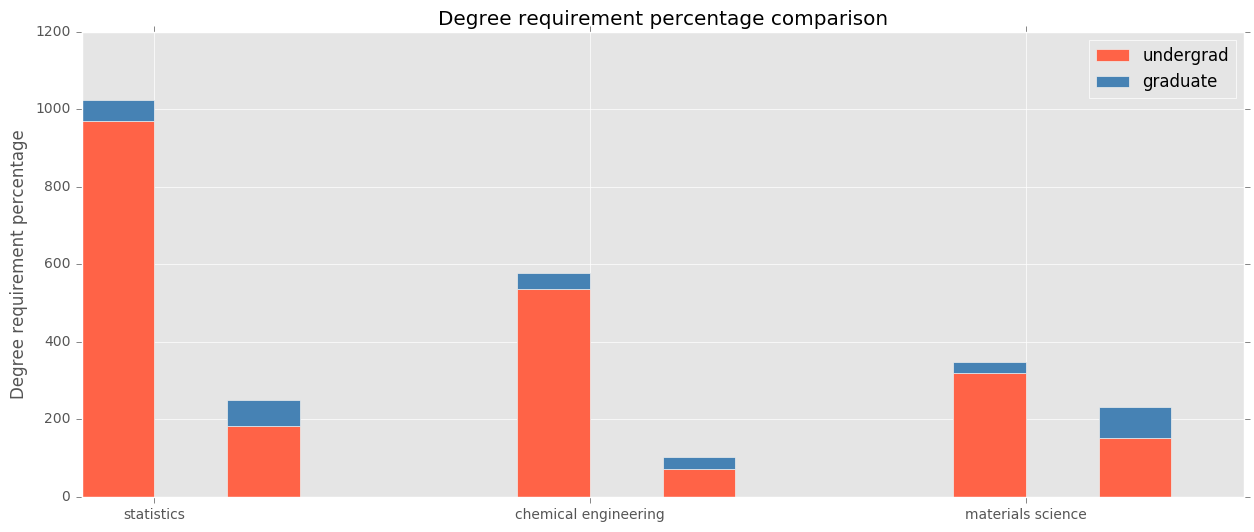

,Count,Degree,Percent,major
0,971,fulltime_undergrad,0.947317,statistics
1,54,fulltime_graduate,0.052683,statistics
2,183,intern_undergrad,0.734940,statistics
3,66,intern_graduate,0.265060,statistics
4,537,fulltime_undergrad,0.927461,chemical engineering
5,42,fulltime_graduate,0.072539,chemical engineering
6,73,intern_undergrad,0.701923,chemical engineering
7,31,intern_graduate,0.298077,chemical engineering
8,320,fulltime_undergrad,0.922190,materials science
9,27,fulltime_graduate,0.077810,materials science


In [161]:
degree_analysis(degree_list_stat, degree_list_che, degree_list_mse, 
                degree_list_stat_intern, degree_list_che_intern, degree_list_mse_intern)